# Import

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pydataset import data
from env import get_db_url

np.random.seed(123)

# Exercises

## 1

In [50]:
s = pd.DataFrame(np.random.poisson(2,10**5))
s.head()

,0
0,2
1,4
2,2
3,2
4,2


$ \textrm{Poisson Distribution:} \\$
$$ P\left( x \right) = \frac{{e^{ - \lambda } \lambda ^x }}{{x!}} $$

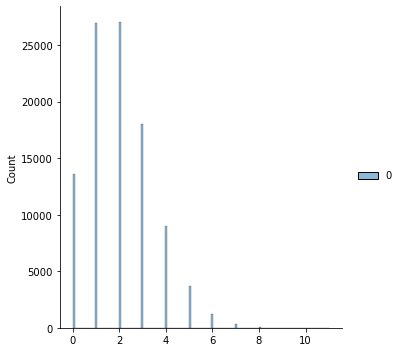

In [51]:
sns.displot(data = s)

Simulation: What is the probability that no cars drive up in the noon hour?

In [52]:
(s==0).mean()

0    0.13582
dtype: float64

Theoretical: What is the probability that no cars drive up in the noon hour?

In [53]:
stats.poisson(2).pmf(0)


0.1353352832366127

Simulation: What is the probability that 3 or more cars come through the drive through?

In [54]:
(s>=3).mean()

0    0.32392
dtype: float64

Theoretical: What is the probability that 3 or more cars come through the drive through?

In [55]:
stats.poisson(2).sf(2)

0.32332358381693654

Simulation: How likely is it that the drive through gets at least 1 car?

In [56]:
(s>=1).mean()

0    0.86418
dtype: float64

Theoretical: How likely is it that the drive through gets at least 1 car?

In [57]:
stats.poisson(2).sf(0)

0.8646647167633873

## 2

In [58]:
grades=pd.DataFrame(np.random.normal(3, 0.3, size=(10**5)))
grades.head(5)

,0
0,3.001212
1,3.002077
2,2.760864
3,3.427162
4,3.067089


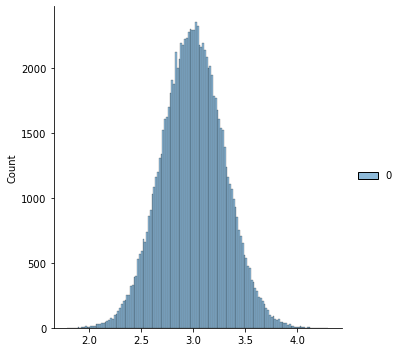

In [59]:
sns.displot(grades)

In [60]:
grades.sort_values(by=0, inplace=True, ignore_index=True)
grades.head()

,0
0,1.789013
1,1.821738
2,1.836344
3,1.839893
4,1.847036


In [61]:
grades.idxmax()

0    99999
dtype: int64

In [62]:
grade_95=int(0.95*grades.idxmax())
grade_95

94999

In [63]:
grades.quantile(0.95)

0    3.49302
Name: 0.95, dtype: float64

Simulation: What grade point average is required to be in the top 5% of the graduating class?

In [64]:
float(grades.values[grade_95].round(4))

3.493

In [65]:
grade_15=int(0.15*grades.idxmax())
grade_15

14999

Simulation: What GPA constitutes the bottom 15% of the class?

In [66]:
float(grades.values[grade_15].round(4))

2.6901

In [67]:
third_decile=int(0.3*grades.idxmax())
third_decile

29999

In [68]:
second_decile=int(0.2*grades.idxmax())
second_decile

19999

Simulation: Determine the range of the third decile.

In [69]:
grades.quantile([0.2,0.3])

,0
0.2,2.747937
0.3,2.841320


In [70]:
# 3rd decile upper bound

float(grades.values[third_decile].round(4))

2.8413

In [71]:
# 3rd decile lower bound

float(grades.values[second_decile].round(4))

2.7479

Simulation: Would a student with a 2.8 grade point average qualify for this scholarship?

In [72]:
# Yes, 2.8 is inside the range of the 3rd-decile.

Simulation: If I have a GPA of 3.5, what percentile am I in?

In [73]:
f"{100*float((grades<=3.5).mean()):.3f}%"

'95.204%'

Theoretical: What grade point average is required to be in the top 5% of the graduating class?

In [74]:
stats.norm(3,0.3).ppf(0.95)

3.4934560880854417

Theoretical: What GPA constitutes the bottom 15% of the class?

In [75]:
stats.norm(3,0.3).ppf(0.15)

2.689069983151863

Theoretical: Determine the range of the third decile.

In [76]:
# 3rd decile lower bound

stats.norm(3,0.3).ppf(0.20)

2.7475136299281258

In [77]:
# 3rd decile upper bound

stats.norm(3,0.3).ppf(0.30)

2.842679846187588

Theoretical: Would a student with a 2.8 grade point average qualify for this scholarship?

In [78]:
# Yes, a 2.8 is within the range of the 3rd decile.

Theoretical: If I have a GPA of 3.5, what percentile am I in?

In [79]:
f"{100*float(stats.norm(3,0.3).cdf(3.5)):.3f}%"

'95.221%'

## 3 

Simulation: How likely is it that this many people or more click through?

In [133]:
(stats.binom(4326,0.02).rvs(10**5)>=97).mean()

0.13788

Theoretical: How likely is it that this many people or more click through?

In [80]:
stats.binom(4326,0.02).sf(96)

0.13975823631416445

## 4

Simulation: What is the probability that at least one of your first 60 answers is correct?

In [ ]:
(stats.binom(4326,0.02).rvs(10**5)>=97).mean()

0.13788

Theoretical: What is the probability that at least one of your first 60 answers is correct?

In [81]:
stats.binom(60,1/101).sf(0)

0.44955038406224

## 5

Theoretical: How likely is it that the break area gets cleaned up each day?

In [82]:
stats.binom((0.9*3*22),0.03).sf(0)

0.8362274861228872

Theoretical: How likely is it that it goes two days without getting cleaned up?

In [83]:
stats.binom((0.9*3*22*2),0.03).pmf(0)

0.026821436301628983

Theoretical: How likely is it that it goes all week without getting cleaned up?

In [84]:
stats.binom((0.9*3*22*5),0.03).pmf(0)

0.00011781621791055051

## 6

Theoretical: What is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class?

In [85]:
stats.norm(15*2,3*2).cdf(60-15-10-2)

0.6914624612740131

## 7

In [88]:
salaries=pd.read_sql(
	'''
	SELECT *
	FROM salaries
	WHERE to_date > CURDATE()

	;
	''', 
	get_db_url('employees'))

In [101]:
salaries.salary.describe()

count    240124.000000
mean      72012.235857
std       17309.995380
min       38623.000000
25%       59048.750000
50%       69805.000000
75%       82546.000000
max      158220.000000
Name: salary, dtype: float64

In [112]:
norm_stats=stats.norm(72012.235857,17309.995380)

### 7.a

Predicted: What percent of employees earn less than 60,000?

In [110]:
norm_stats.cdf(6e4)

0.2438574248045388

Observed: What percent of employees earn less than 60,000?

In [ ]:
(salaries.salary<6e4).mean()

0.2705727041028802

### 7.b

Predicted: What percent of employees earn more than 95,000?

In [113]:
norm_stats.sf(9.5e4)

0.09208819199191742

Observed: What percent of employees earn more than 95,000?

In [97]:
(salaries.salary>9.5e4).mean()

0.1086272092752078

### 7.c

Predicted: What percent of employees earn between 65,000 and 80,000?

In [114]:
norm_stats.cdf(8e4)-norm_stats.cdf(6.5e4)

0.33506056854908584

Observed: What percent of employees earn between 65,000 and 80,000?

In [100]:
(salaries.salary.between(65_000, 80_000)).mean()

0.32515700221552196

### 7.d

Predicted: What do the top 5% of employees make?

In [116]:
norm_stats.isf(0.05)

100484.64454030624

Observed: What do the top 5% of employees make?

In [99]:
salaries.salary.quantile(0.95)

104225.84999999998